# 大选数据可视化

#### 需要用到的包：
pandas 用于数据分析  
geopandas 用于可视化作图   [安装方法](https://geopandas.org/install.html#installing-with-anaconda-conda)

In [21]:
import pandas as pd
import geopandas as gpd
import geoplot
import matplotlib.pyplot as plt
import contextily as ctx

### 美国各州的划分

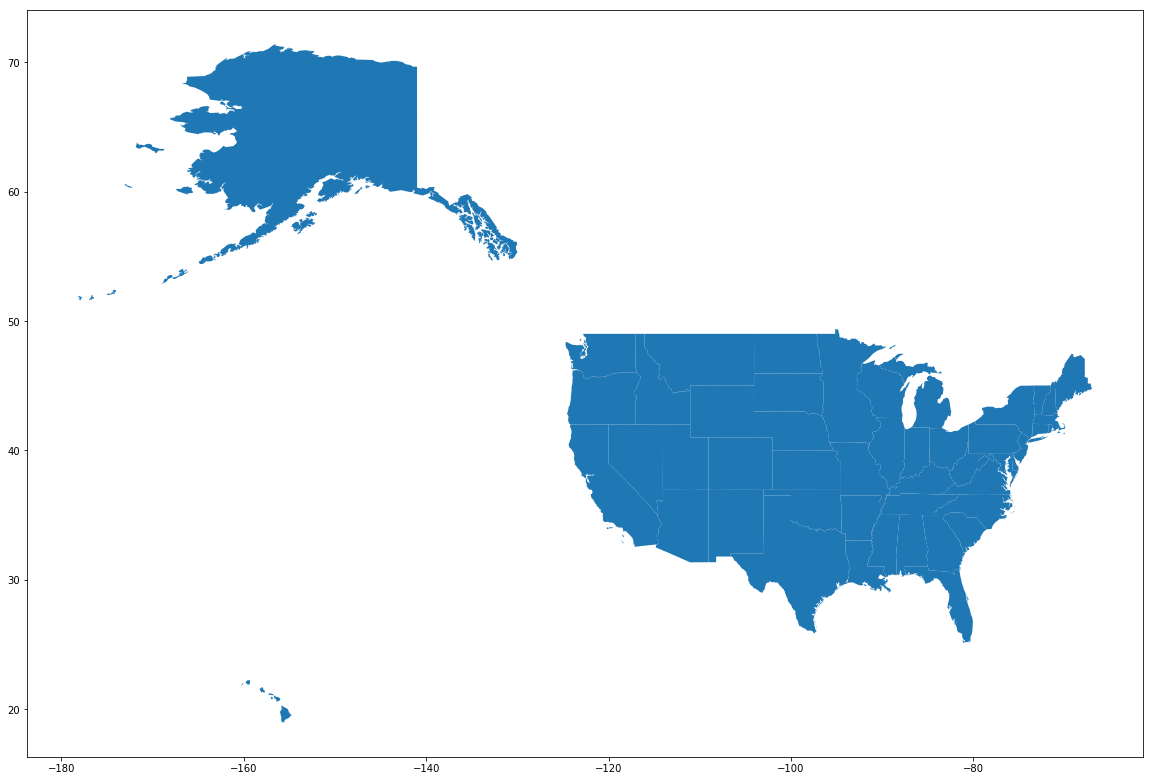

In [2]:
path = r'E:\Study\SSPKU\python\小组课题\USA_States\USA_States.shp'
usa_state = gpd.read_file(path)
usa_state.plot(figsize=(20,18)) # figsize：图片大小

### 美国郡县的划分

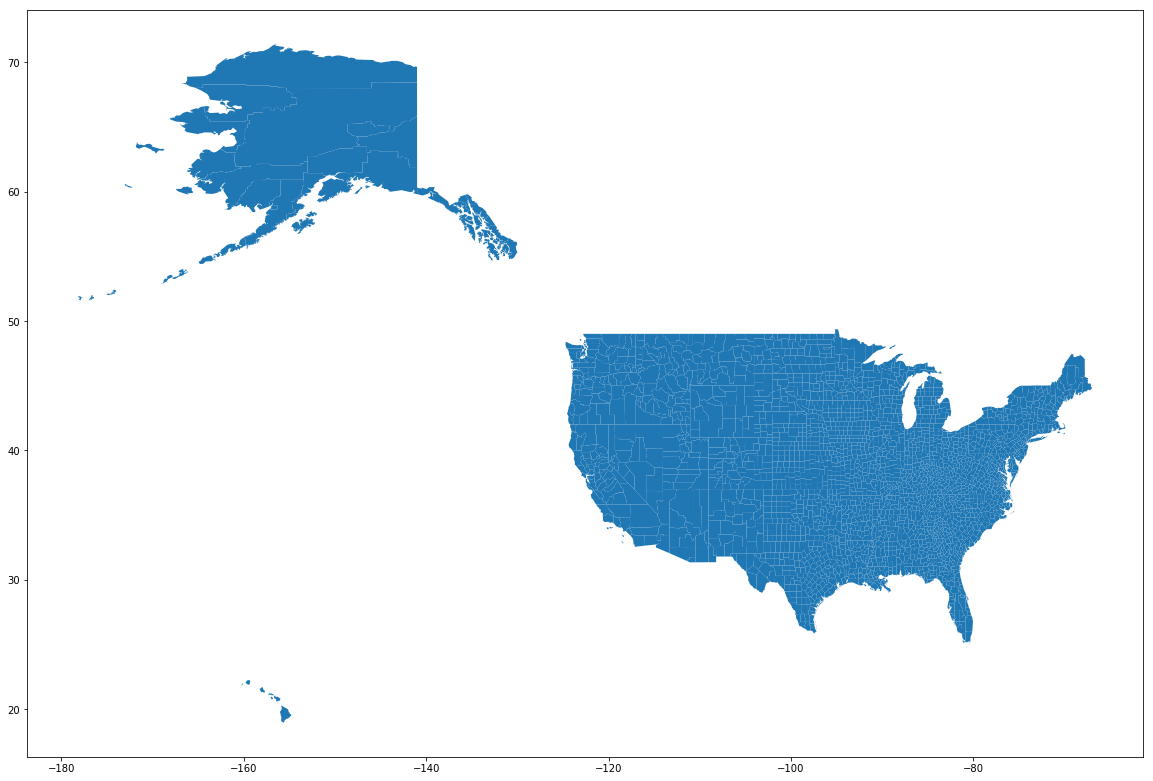

In [3]:
path = r'E:\Study\SSPKU\python\小组课题\USA_Counties\USA_Counties.shp'
usa_county = gpd.read_file(path)
usa_county.plot(figsize=(20,18))

### 美国城市的分布

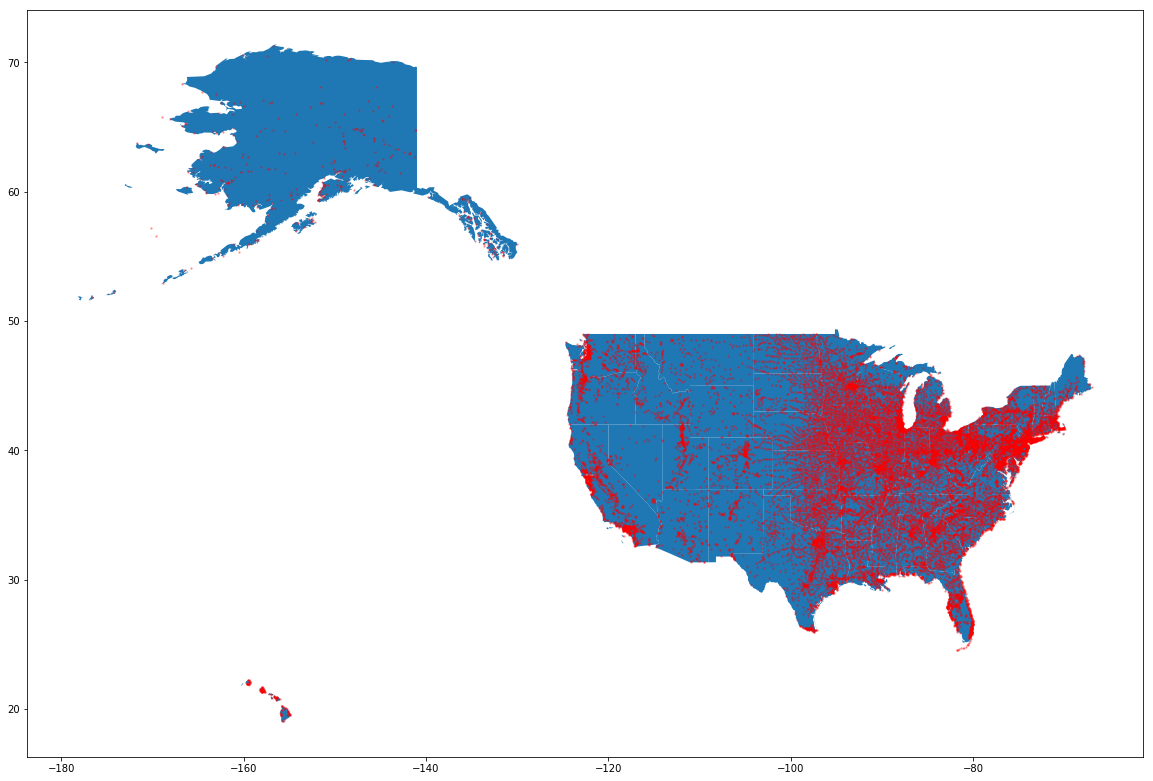

In [5]:
path = r'E:\Study\SSPKU\python\小组课题\USA_Cities_Towns\USA_Cities_Towns.shp'
usa_s = usa_state.plot(figsize=(20,18))
usa_city = gpd.read_file(path)
usa_city.plot(ax=usa_s, color="red", alpha=0.3, markersize=2, figsize=(20,18))  
# plt.show()
# alpha: 点的透明度，markersize：点的大小

D:\Program Files (x86)\Anaconda3\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
D:\Program Files (x86)\Anaconda3\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
D:\Program Files (x86)\Anaconda3\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
D:\Program Files (x86)\Anaconda3\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
D:\Program Files (x86)\Anaconda3\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
D:\Program Files (x86)\Anaconda3\lib\site-packages

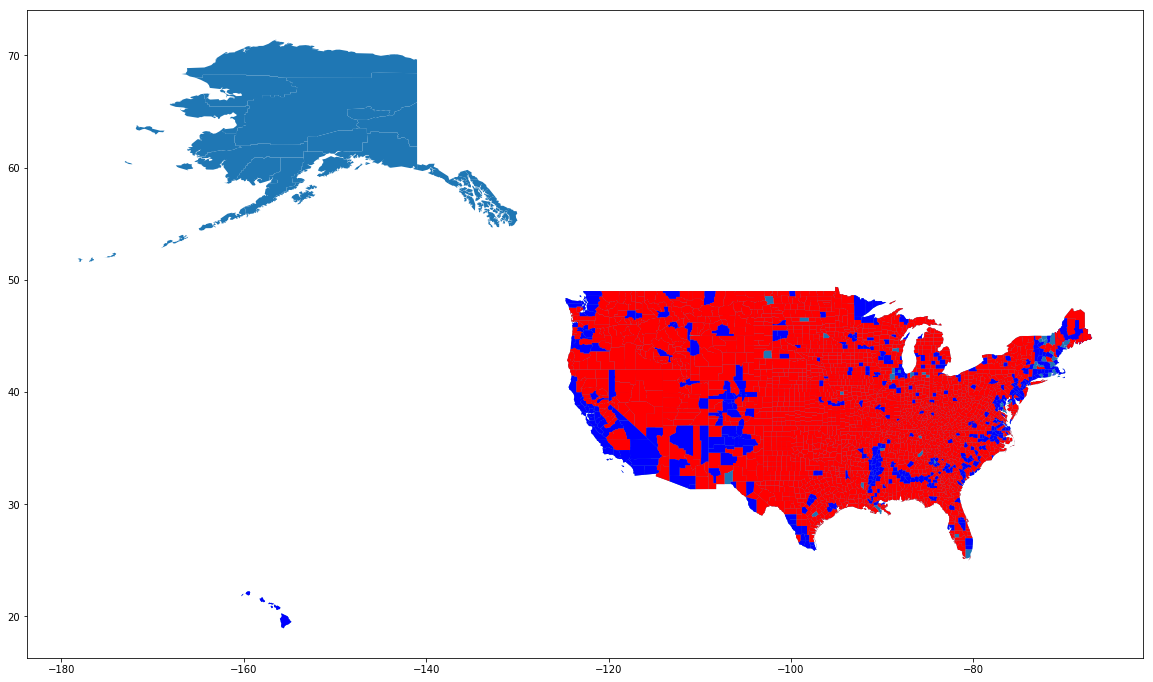

<Figure size 432x288 with 0 Axes>

In [35]:
def draw_state_county():
    # 画选定州的底图
    path = r'E:\Study\SSPKU\python\小组课题\USA_Counties\USA_Counties.shp'
    usa_county = gpd.read_file(path)
    base_map = usa_county.plot(figsize=(20,20))
    
    # 读取大选数据
    path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_county_candidate.csv'
    county_data = pd.read_csv(path)
    state_data = county_data[county_data['won']==True]
    state_data
    # 修改county的名称（删掉最后一个词）
    for index, row in state_data.iterrows():
        
        while row['county'] not in list(usa_county['NAME']) and row['county'] != list(usa_county['NAME']):
            name = row['county']
            name = name.split(' ')
            name = name[0:len(name)-1]
            name = " ".join(name)
            row['county'] = name
            if name == "": break

        if row['county'] in list(usa_county['NAME']) or row['county'] == list(usa_county['NAME']):
            a = usa_county['NAME'] == row['county']
            b = usa_county['STATE_NAME']==row['state']
            if row['candidate'] == 'Joe Biden':
                usa_county[a & b].plot(ax=base_map, color='Blue')
            if row['candidate'] == 'Donald Trump':
                usa_county[a & b].plot(ax=base_map, color='red')
    plt.show()
    plt.savefig('E:/Study/SSPKU/python/小组课题/web/images/general.jpg')
            
if __name__ == '__main__':
    draw_state_county()

In [28]:
path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_county_candidate.csv'
county_data = pd.read_csv(path)
state_data = county_data[county_data['won']==True]
state_data

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
8,Delaware,Sussex County,Donald Trump,REP,71230,True
12,District of Columbia,District of Columbia,Joe Biden,DEM,35485,True
19,District of Columbia,Ward 2,Joe Biden,DEM,26086,True
...,...,...,...,...,...,...
31124,Arizona,Graham County,Donald Trump,REP,10747,True
31127,Arizona,Greenlee County,Donald Trump,REP,2433,True
31130,Arizona,La Paz County,Donald Trump,REP,5129,True
31133,Arizona,Maricopa County,Joe Biden,DEM,1040553,True


### 州地图

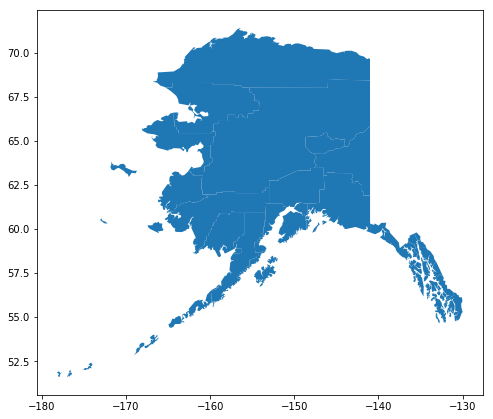

In [4]:
def draw_state_county(state_name):
    # 画选定州的底图
    path = r'E:\Study\SSPKU\python\小组课题\USA_Counties\USA_Counties.shp'
    usa_county = gpd.read_file(path)
    usa_state = usa_county[usa_county['STATE_NAME'] == state_name]
    base_map = usa_state.plot(figsize=(8,8))
    
    # 读取大选数据
    path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_county_candidate.csv'
    county_data = pd.read_csv(path)
    state_data = county_data[county_data['state'] == state_name]
    state_data = state_data[state_data['won']==True]

    # 修改county的名称（删掉最后一个词）
    for index, row in state_data.iterrows():
        while row['county'] not in list(usa_state['NAME']) and row['county'] != list(usa_state['NAME']):
            name = row['county']
            name = name.split(' ')
            name = name[0:len(name)-1]
            name = " ".join(name)
            row['county'] = name
            if name == "": break

        if row['county'] in list(usa_state['NAME']) or row['county'] == list(usa_state['NAME']):
            if row['candidate'] == 'Joe Biden':
                usa_state[usa_state['NAME'] == row['county']].plot(ax=base_map, color='Blue')
            if row['candidate'] == 'Donald Trump':
                usa_state[usa_state['NAME'] == row['county']].plot(ax=base_map, color='red')
    plt.savefig('E:/Study/SSPKU/python/小组课题/web/images/' + state_name + '.jpg')
            
if __name__ == '__main__':
    draw_state_county('Alaska')

## 使用pyecharts绘制美国地图（可交互）

可以在这个网站将.shp文件转换为.geojson文件：https://mapshaper.org/

In [6]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.datasets import register_url

try:
    register_url("https://echarts-maps.github.io/echarts-countries-js/")
except Exception:
    import ssl

    ssl._create_default_https_context = ssl._create_unverified_context
    register_url("https://echarts-maps.github.io/echarts-countries-js/")

geo = (
    Geo(init_opts=opts.InitOpts(width="1895px", height="920px"))
    .add_schema(maptype="美国", itemstyle_opts=opts.ItemStyleOpts(border_color="#111"))
    .set_global_opts(title_opts=opts.TitleOpts(title="美国地图"))
    .render("geo_chart_USA_js.html")
)

In [19]:
# 用pyecharts读json文件
import json

f = open(r'E:\Study\SSPKU\python\小组课题\USA_Counties.json', encoding='gbk')
data = json.load(f)
# data
typea = data['geometries']

### 分析大选数据

In [10]:
path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_state.csv'
president = pd.read_csv(path)
state = president['state'].tolist()
vote = president['total_votes'].tolist()
maxVote = max(vote)
list1 = [[state[i], vote[i]] for i in range(len(state))]

In [250]:
# 点状

try:
    register_url("https://echarts-maps.github.io/echarts-countries-js/")
except Exception:
    import ssl

    ssl._create_default_https_context = ssl._create_unverified_context
    register_url("https://echarts-maps.github.io/echarts-countries-js/")

geo = (
    Geo(init_opts=opts.InitOpts(width="1895px", height="920px"))
    .add_schema(maptype="美国", itemstyle_opts=opts.ItemStyleOpts(border_color="#111"))
    .add_coordinate('Washington',-120.04,47.56)
    .add_coordinate('Oregon',-120.37,43.77)
    .add_coordinate('California',-120.44,36.44)
    .add_coordinate('Alaska',-122.00,28.46)
    .add_coordinate('Idaho',-114.08,43.80)
    .add_coordinate('Nevada',-116.44,39.61)
    .add_coordinate('Montana',-109.42,47.13)
    .add_coordinate('Wyoming',-107.29,42.96)
    .add_coordinate('Utah',-111.19,39.35)
    .add_coordinate('Arizona',-111.70,34.45)
    .add_coordinate('Hawaii',-105.25,28.72)
    .add_coordinate('Colorado',-105.52,38.89)
    .add_coordinate('New Mexico',-106.11,34.45)
    .add_coordinate('North Dakota',-100.22,47.53)
    .add_coordinate('South Dakota',-100.52,44.72)
    .add_coordinate('Nebraska',-99.64,41.65)
    .add_coordinate('Kansas',-98.53,38.43)
    .add_coordinate('Oklahoma',-97.13,35.42)
    .add_coordinate('Texas',-98.16,31.03)
    .add_coordinate('Minnesota',-94.26,46.02)
    .add_coordinate('Iowa',-93.60,42.09)
    .add_coordinate('Missouri',-92.57,38.48)
    .add_coordinate('Arkansas',-92.43,34.69)
    .add_coordinate('Louisiana',-92.49,31.22)
    .add_coordinate('Wisconsin',-89.55,44.25)
    .add_coordinate('Michigan',-84.62,43.98)
    .add_coordinate('Illinois',-89.11,40.20)
    .add_coordinate('Indiana',-86.17,40.08)
    .add_coordinate('Ohio',-82.71,40.31)
    .add_coordinate('Kentucky',-84.92,37.44)
    .add_coordinate('Tennessee',-86.32,35.78)
    .add_coordinate('Mississippi',-89.63,32.66)
    .add_coordinate('Alabama',-86.68,32.53)
    .add_coordinate('Florida',-81.68,28.07)
    .add_coordinate('Georgia',-83.22,32.59)
    .add_coordinate('South Carolina',-80.65,33.78)
    .add_coordinate('North Carolina',-78.88,35.48)
    .add_coordinate('Virginia',-78.24,37.48)
    .add_coordinate('West Virginia',-80.63,38.62)
    .add_coordinate('Pennsylvania',-77.57,40.78)
    .add_coordinate('New York',-75.22,43.06)
    .add_coordinate('Maryland',-76.29,39.09)
    .add_coordinate('Delaware',-75.55,39.09)
    .add_coordinate('New Jersey',-74.47,40.03)
    .add_coordinate('Vermont',-72.70,44.13)
    .add_coordinate('New Hampshire',-71.64,43.59)
    .add_coordinate('Massachusetts',-72.09,42.33)
    .add_coordinate('Connecticut',-72.63,41.67)
    .add_coordinate('Rhode Island',-71.49,41.64)
    .add_coordinate('Maine',-69.06,45.16)
    .add_coordinate('District of Columbia',-77.04,38.90)
    .add(series_name="Total Votes by States", data_pair=list1)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="美国地图"),
        visualmap_opts=opts.VisualMapOpts(max_ = maxVote)
    )
    .render("geo_chart_USA1_js.html")
)

In [36]:
# 区块型

from pyecharts.charts import Map
def map_usa() -> Map:
    c = (
        Map(init_opts=opts.InitOpts(width="1895px", height="920px"))
        .add("", [list(z) for z in list1], "美国", is_map_symbol_show=False)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="美国地图 Total Votes"),
            visualmap_opts=opts.VisualMapOpts(max_=maxVote),
        )
    )
    return c
if __name__ == '__main__':
    gd = map_usa()
    gd.render(path="geo_chart_USA2_js.html")

In [232]:
path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_state.csv'
president = pd.read_csv(path)
state = president['state'].tolist()
vote = president['total_votes'].tolist()
list1 = [[state[i], vote[i]] for i in range(len(state))]

### Joe 与 Trump 分别作图

In [37]:
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.datasets import register_url

def map_Joe() -> Map:
    path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_state_candidate.csv'
    president = pd.read_csv(path)
    state = president['state'].tolist()
    vote = president['Joe'].tolist()
#     maxVote = max(vote)
    list1 = [[state[i], vote[i]] for i in range(len(state))]
    c = (
        Map(init_opts=opts.InitOpts(width="1895px", height="920px"))
        .add("", [list(z) for z in list1], "美国", is_map_symbol_show=False)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Joe Votes"),
            visualmap_opts=opts.VisualMapOpts(max_=maxVote),
        )
    )
    return c
if __name__ == '__main__':
    gd = map_Joe()
    gd.render(path="geo_chart_Joe_js.html")

In [38]:
def map_Trump() -> Map:
    path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_state_candidate.csv'
    president = pd.read_csv(path)
    state = president['state'].tolist()
    vote = president['Trump'].tolist()
#     maxVote = max(vote)
    list1 = [[state[i], vote[i]] for i in range(len(state))]
    c = (
        Map(init_opts=opts.InitOpts(width="1895px", height="920px"))
        .add("", [list(z) for z in list1], "美国", is_map_symbol_show=False)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Trump Votes"),
            visualmap_opts=opts.VisualMapOpts(max_=maxVote),
        )
    )
    return c
if __name__ == '__main__':
    gd = map_Trump()
    gd.render(path="geo_chart_Trump_js.html")

### 根据 win 画出每个州的获胜情况
Joe获胜为蓝色，Trump获胜为红色，数据标注上该州的选举人票数

In [39]:
def map_win() -> Map:
    path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_state_candidate.csv'
    president = pd.read_csv(path)
    state = president['state'].tolist()
    vote = president['Win'].tolist()
    for i in range(len(vote)):
        if vote[i] == 'Donald Trump':
            vote[i] = 1
        else:
            vote[i] = 0
#     maxVote = max(vote)
    list1 = [[state[i], vote[i]] for i in range(len(state))]

    c = (
        Map(init_opts=opts.InitOpts(width="1895px", height="920px"))
        .add("", [list(z) for z in list1], "美国", is_map_symbol_show=False)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Final Results"),
            visualmap_opts=opts.VisualMapOpts(max_=1),
        )
    )
    return c
if __name__ == '__main__':
    gd = map_win()
    gd.render(path="geo_chart_win_js.html")

In [42]:
def map_ele() -> Map:
    path = 'E:\Study\SSPKU\python\小组课题\Election V67\president_state_candidate.csv'
    president = pd.read_csv(path)
    state = president['state'].tolist()
    vote = president['electoral'].tolist()
#     maxVote = max(vote)
    list1 = [[state[i], vote[i]] for i in range(len(state))]
    c = (
        Map(init_opts=opts.InitOpts(width="1895px", height="920px"))
        .add("", [list(z) for z in list1], "美国", is_map_symbol_show=False)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Electoral Votes"),
            visualmap_opts=opts.VisualMapOpts(max_=55),
        )
    )
    return c
if __name__ == '__main__':
    gd = map_ele()
    gd.render(path="geo_chart_Electoral_js.html")

## Kepler.gl

In [46]:
from keplergl import KeplerGl

config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "dxcy3u",
          "type": "heatmap",
          "config": {
            "dataId": "data_2",
            "label": "Point",
            "color": [
              137,
              218,
              193
            ],
            "columns": {
              "lat": "lat",
              "lng": "lon"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 44.8
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "weightField": {
              "name": "Population",
              "type": "integer"
            },
            "weightScale": "linear"
          }
        },
        {
          "id": "zlpw6t2m",
          "type": "geojson",
          "config": {
            "dataId": "data_2",
            "label": "data_2",
            "color": [
              179,
              173,
              158
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "data_2": [
              {
                "name": "AREANAME",
                "format": None
              },
              {
                "name": "Population",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 36.17077256765155,
      "longitude": -117.19268307075694,
      "pitch": 0,
      "zoom": 4.341937269359789,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": False,
        "border": True,
        "building": False,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

path = r'E:\Study\SSPKU\python\小组课题\共享资源\Nevada_population_cleaned.csv'
with open(path, 'r') as f:
    csvData = f.read()
# map_1 = KeplerGl()
map_1 = KeplerGl(height=400,data={"data_2":csvData},config=config)

map_1.save_to_html(file_name='NevadaHeatmap.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to NevadaHeatmap.html!


In [50]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "vo9fr0b",
          "type": "geojson",
          "config": {
            "dataId": "data_2",
            "label": "data_2",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": [
                221,
                178,
                124
              ],
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "percent",
              "type": "real"
            },
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "data_2": [
              {
                "name": "state",
                "format": None
              },
              {
                "name": "county",
                "format": None
              },
              {
                "name": "Joe",
                "format": None
              },
              {
                "name": "total_votes",
                "format": None
              },
              {
                "name": "percent",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 38.517633326089296,
      "longitude": -102.08258659633265,
      "pitch": 0,
      "zoom": 3.766336135818192,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}
path = r'E:\Study\SSPKU\python\小组课题\president_county_Joe_withGeodata.csv'
with open(path, 'r') as f:
    csvData = f.read()
# map_1 = KeplerGl()
map_1 = KeplerGl(height=400,data={"data_2":csvData},config=config)

map_1.save_to_html(file_name='E:\Study\SSPKU\python\小组课题\Joe_percent.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to E:\Study\SSPKU\python\小组课题\Joe_percent.html!


In [52]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "vo9fr0b",
          "type": "geojson",
          "config": {
            "dataId": "data_2",
            "label": "data_2",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": [
                221,
                178,
                124
              ],
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "percent",
              "type": "real"
            },
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "data_2": [
              {
                "name": "state",
                "format": None
              },
              {
                "name": "county",
                "format": None
              },
              {
                "name": "Joe",
                "format": None
              },
              {
                "name": "total_votes",
                "format": None
              },
              {
                "name": "percent",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 38.517633326089296,
      "longitude": -102.08258659633265,
      "pitch": 0,
      "zoom": 3.766336135818192,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}
path = r'E:\Study\SSPKU\python\小组课题\president_county_Trump_withGeodata.csv'
with open(path, 'r') as f:
    csvData = f.read()
# map_1 = KeplerGl()
map_1 = KeplerGl(height=400,data={"data_2":csvData},config=config)

map_1.save_to_html(file_name='E:\Study\SSPKU\python\小组课题\Trump_percent.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to E:\Study\SSPKU\python\小组课题\Trump_percent.html!


In [56]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "rwq7uc",
          "type": "geojson",
          "config": {
            "dataId": "data_2",
            "label": "data_2",
            "color": [
              255,
              153,
              31
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.83,
              "strokeOpacity": 0.64,
              "thickness": 0.5,
              "strokeColor": [
                241,
                92,
                23
              ],
              "colorRange": {
                "name": "ColorBrewer Set1-3",
                "type": "qualitative",
                "category": "ColorBrewer",
                "colors": [
                  "#e41a1c",
                  "#377eb8",
                  "#4daf4a"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": True,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "candidate",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "data_2": [
              {
                "name": "state",
                "format": None
              },
              {
                "name": "county",
                "format": None
              },
              {
                "name": "candidate",
                "format": None
              },
              {
                "name": "total_votes",
                "format": None
              },
              {
                "name": "color",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 39.4998439413434,
      "longitude": -111.92993846617591,
      "pitch": 0,
      "zoom": 3,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

path = r'E:\Study\SSPKU\python\小组课题\president_county_win_withGeodata.csv'
with open(path, 'r') as f:
    csvData = f.read()
# map_1 = KeplerGl()
map_1.save_to_html(file_name='E:\Study\SSPKU\python\小组课题\general_votes.html')

Map saved to E:\Study\SSPKU\python\小组课题\general_votes.html!


In [12]:
from keplergl import KeplerGl

path = r'E:\Study\SSPKU\python\小组课题\president_state_win_withGeodata.csv'
path2 = r'E:\Study\SSPKU\python\小组课题\president_county_win_withGeodata.csv'
with open(path, 'r') as f:
    csvData = f.read()
with open(path2, 'r') as f2:
    csvData2 = f2.read()

config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "ktdt15",
          "type": "geojson",
          "config": {
            "dataId": "data_1",
            "label": "data_1",
            "color": [
              30,
              150,
              190
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.23,
              "thickness": 0.5,
              "strokeColor": [
                93,
                61,
                35
              ],
              "colorRange": {
                "name": "ColorBrewer Set1-3",
                "type": "qualitative",
                "category": "ColorBrewer",
                "colors": [
                  "#e41a1c",
                  "#377eb8",
                  "#4daf4a"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": True,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "Win",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        },
        {
          "id": "py4qs0i",
          "type": "geojson",
          "config": {
            "dataId": "data_2",
            "label": "data_2",
            "color": [
              179,
              173,
              158
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.49,
              "thickness": 0.5,
              "strokeColor": [
                136,
                106,
                83
              ],
              "colorRange": {
                "name": "ColorBrewer Set1-3",
                "type": "qualitative",
                "category": "ColorBrewer",
                "colors": [
                  "#e41a1c",
                  "#377eb8",
                  "#4daf4a"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": True,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "candidate",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "data_1": [
              {
                "name": "state",
                "format": None
              },
              {
                "name": "total_votes",
                "format": None
              },
              {
                "name": "Joe",
                "format": None
              },
              {
                "name": "Trump",
                "format": None
              },
              {
                "name": "Other",
                "format": None
              }
            ],
            "data_2": [
              {
                "name": "state",
                "format": None
              },
              {
                "name": "county",
                "format": None
              },
              {
                "name": "candidate",
                "format": None
              },
              {
                "name": "total_votes",
                "format": None
              },
              {
                "name": "color",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 37.91439068004052,
      "longitude": -101.90101773459544,
      "pitch": 0,
      "zoom": 3,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}
    
map_1 = KeplerGl(config=config)
map_1.add_data(data=csvData,name='data_1')
map_1.add_data(data=csvData2,name='data_2')
map_1.save_to_html(file_name='E:\Study\SSPKU\python\小组课题\general_state_votes.html')
# map_1 = KeplerGl()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to E:\Study\SSPKU\python\小组课题\general_state_votes.html!
